In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from lsst.sims.movingObjects import Orbits

In [48]:
modelfile = '/epyc/users/lynnej/sso/l7/L7SyntheticModel-v09.txt'
columns = ['a', 'e', 'inc', 'Omega', 'argPeri', 'meanAnomaly', 'H', 'j', 'type', 'inner', 'outer']
model = pd.read_csv(modelfile, delim_whitespace=True, comment='#', names=columns, index_col=False)
model = model.assign(epoch=2453157.50000 - 2400000.5)

In [49]:
print(len(model))
model[0:5]

66038


,a,e,inc,Omega,argPeri,meanAnomaly,H,j,type,inner,outer,epoch
0,38.336,0.001,3.036,345.797,199.371,72.807,8.27,38.32,classical,i,0,53157.0
1,38.330,0.096,46.676,304.211,270.197,219.758,7.20,41.30,classical,i,0,53157.0
2,38.642,0.045,25.972,150.546,50.755,175.433,7.01,40.39,classical,i,0,53157.0
3,38.090,0.102,33.917,45.783,84.110,308.399,7.42,35.95,classical,i,0,53157.0
4,38.596,0.088,22.640,159.452,150.695,136.007,7.56,41.18,classical,i,0,53157.0


In [50]:
subsetLen = 5000
# Pick a random subset of the model: 
sub = model.sample(subsetLen)

Text(0, 0.5, 'inclination (deg)')

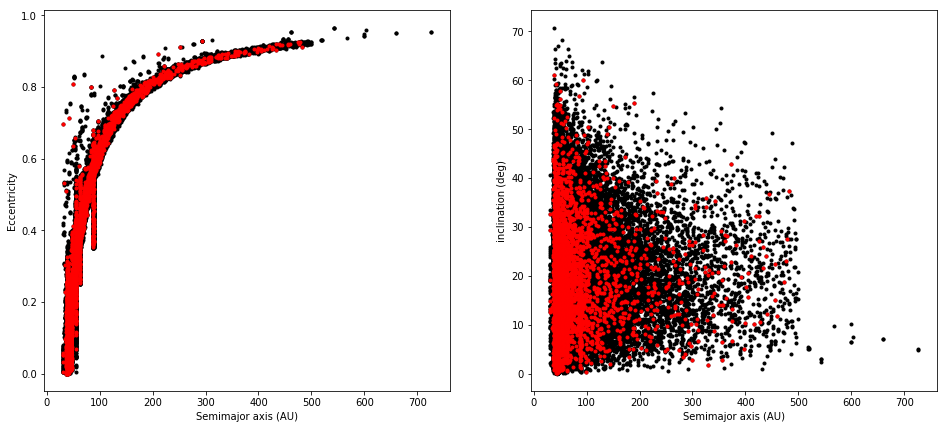

In [54]:
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.plot(model.a, model.e, 'k.')
plt.plot(sub.a, sub.e, 'r.')
plt.xlabel("Semimajor axis (AU)")
plt.ylabel("Eccentricity")
plt.subplot(1,2,2)
plt.plot(model.a, model.inc, 'k.')
plt.plot(sub.a, sub.inc, 'r.')
plt.xlabel("Semimajor axis (AU)")
plt.ylabel("inclination (deg)")

In [53]:
subsetLen = 5000
subpieces = 500
root = 'l7_5k'

subset = Orbits()
subset.setOrbits(model.sample(subsetLen))
print(len(model), len(subset), len(subset.orbits.objId.unique()))
subset.orbits.to_csv('%s.txt' % root, index=False, sep=' ')

x = np.arange(0, subsetLen+1, subpieces)
try:
    os.mkdir('split')
except FileExistsError:
    pass

for i, (xi, xo) in enumerate(zip(x[:-1], x[1:])):
    subset.orbits[xi:xo].to_csv('split/%s_%d.txt' % (root, i), index=False, sep=' ')

66038 5000 5000


In [56]:
# snapshot
from lsst.sims.movingObjects import PyOrbEphemerides

pyephs = PyOrbEphemerides()
pyephs.setOrbits(subset)
ephs = pyephs.generateEphemerides(times = [subset.orbits.epoch.iloc[0]])

Text(0, 0.5, 'Dec')

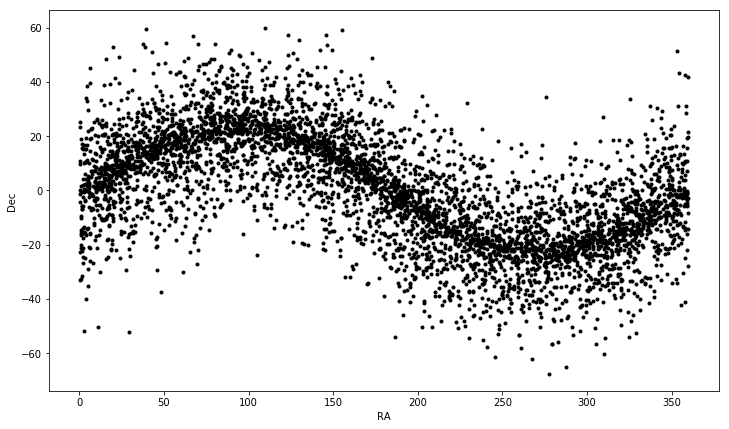

In [58]:
plt.figure(figsize=(12, 7))
plt.plot(ephs['ra'], ephs['dec'], 'k.')
plt.xlabel('RA')
plt.ylabel('Dec')